In [36]:
import numpy as np
import matplotlib.pyplot as plt
import PL.process_data as pr
from PL.preprocessing import get_big_cleaned_data, merge_lista_results

In [10]:
np.random.seed(1234)

dfs = get_big_cleaned_data()
merged, info = merge_lista_results(dfs, return_overview_cols=True)


merging "lista" columns...


# Ranking by area code

We can utilize some ranking (based on relatively simple uniformity and independence statistics of last digits, see code for more details) based on a few features to identify areas where records of the election results seem more irregular, perhaps doctored.

As we see below, the ranking yields diverse scores, suggesting some degree of distinction was successfully made.

In [35]:
ranking = pr.check_ranking(merged, info)

print(len(ranking))

ranking.head(20)

2477


group_id
61801     0.000000
140605    0.000006
60101     0.000009
302306    0.000015
280304    0.000020
121113    0.000033
22606     0.000043
241504    0.000065
240605    0.000074
60911     0.000166
101213    0.000166
302406    0.000166
200803    0.000172
143002    0.000172
280504    0.000180
60201     0.000191
321001    0.000196
102004    0.000251
21702     0.000288
320703    0.000295
dtype: float64

In [34]:
print(ranking[1000:1020])

group_id
300708    0.186740
120603    0.186740
21605     0.186740
220403    0.186740
320502    0.187821
220203    0.187821
181006    0.188161
220104    0.190000
20305     0.190000
320405    0.190000
80408     0.190000
140802    0.190745
80302     0.190812
306401    0.191576
141211    0.191662
20812     0.191981
142007    0.191981
140902    0.191981
241604    0.191981
200101    0.192064
dtype: float64


(array([432., 241., 229., 135., 117., 156.,  93.,  64., 132.,  72., 104.,
        104.,  59.,  66.,   9.,  10.,   7.,  20.,   9., 418.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

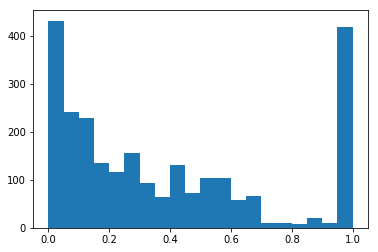

In [37]:
plt.hist(ranking, bins=20)

# Fingerprint plots

In Poland there were two major winners with relatively close results (27 vs 22 seats won [1]), those on Lista 3 and Lista 4. Lista 4 is a party list featuring the current ruling party, PiS. Lista 3 comprises a joint effort of the opposition, such as Platforma Obywatelska (Civic Platform).

Overall election fingerprint plots are themselves far from the impression of a joint normal distribution, the below plots show them decomposed into two halves based on the aforementioned digit irregularity ranking.

## Lista 4

Lista 4 seems to have underperformed in the more suspicious regions.

plot saved as fingerprints_Poland/Top 50% lista 4.png


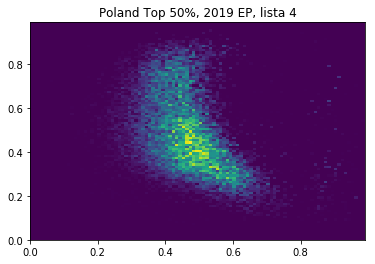

In [18]:
top_50_to = int(len(ranking) / 2)
areas = ranking.index[:top_50_to]
pr.plot_PL_fingerprint(merged, info, areas, "Top 50% (more suspicious half)", 4)

plot saved as fingerprints_Poland/Bottom 50% lista 4.png


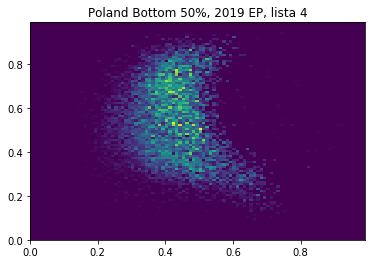

In [22]:
areas = ranking.index[top_50_to:]
pr.plot_PL_fingerprint(merged, info, areas, "Bottom 50%", 3)

## Lista 3

Lista 3 seems to exhibit a stabler and better performance in the more suspicious regions.


plot saved as fingerprints_Poland/Top 50% (more suspicious half) lista 3.png


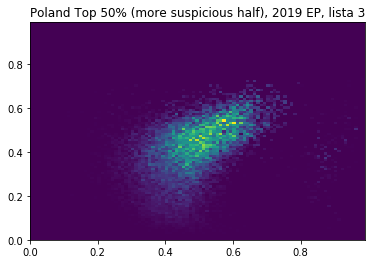

In [31]:
top_50_to = int(len(ranking) / 2)
areas = ranking.index[:top_50_to]
pr.plot_PL_fingerprint(merged, info, areas, "Top 50% (more suspicious half)", 3)

plot saved as fingerprints_Poland/Bottom 50% lista 3.png


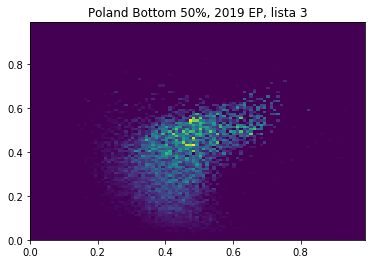

In [32]:
top_50_to = int(len(ranking) / 2)
areas = ranking.index[top_50_to:]
pr.plot_PL_fingerprint(merged, info, areas, "Bottom 50%", 3)

References

[1] [2019 European Parliament election in Poland, Wikipedia](https://en.wikipedia.org/wiki/2019_European_Parliament_election_in_Poland)